In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## 1. Load the survey data

In [5]:
DATA_DIR = Path.cwd().parent / 'data'
DATA_FILEPATHS = list(DATA_DIR.glob('*'))

print(DATA_FILEPATHS)

[PosixPath('/Users/gurpreetjohl/workspace/python/growingeconomy/data/lfs_quarterly_variables.csv'), PosixPath('/Users/gurpreetjohl/workspace/python/growingeconomy/data/lfs_monthly_variables.csv'), PosixPath('/Users/gurpreetjohl/workspace/python/growingeconomy/data/qual_survey_responses.csv'), PosixPath('/Users/gurpreetjohl/workspace/python/growingeconomy/data/variable_names.csv')]


In [8]:
survey_df = pd.read_csv(str(DATA_FILEPATHS[2]))
survey_df

,Participant ID,Employment Status,UK Region,Response
0,P001,Unemployed,Scotland,The government should focus on providing more ...
1,P002,Employed,North West,I believe the government should create more in...
2,P003,Self-employed,London,The government needs to address the root cause...
3,P004,Unemployed,Wales,The government should increase unemployment be...
4,P005,Employed,South East,I think the government is already doing too mu...
...,...,...,...,...
105,P106,Employed,East of England,I think the government should focus on promoti...
106,P107,Unemployed,West Midlands,The government needs to improve support for pe...
107,P108,Self-employed,North East,The government should focus on supporting the ...
108,P109,Unemployed,Scotland,The government should provide more support for...


## 2. Generate a word cloud of the responses

Remove additional stop words which may just be restating the original question: "what do you think the government should be doing to address economic inactivity (unemployment)”

Join this with the default set of stopwords which catches the typical cases.

In [39]:
LOGO_FPATH = Path.cwd().parent / 'assets' / 'Nesta_Logo.png'

In [58]:
nesta_mask = np.array(Image.open(LOGO_FPATH))
nesta_mask = nesta_mask.sum(axis=2) / 3
nesta_mask

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

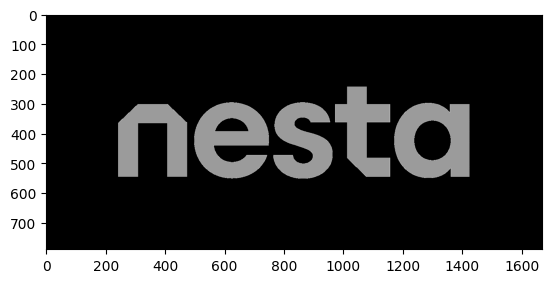

In [60]:
plt.imshow(nesta_mask, cmap='Greys')

In [34]:
survey_stopwords = {
    'government',
    'address',
    'economic',
    'inactivity',
    'additionally',
    'provide',
    'employment',
    'unemployment',
}

all_stopwords = survey_stopwords | STOPWORDS

In [87]:
# Generate a word cloud from the concatenated responses.
joined_text = ' \n '.join(survey_df['Response'].values).lower()
wordcloud = (WordCloud(stopwords=all_stopwords,
                       max_words=150,
                       mask=nesta_mask,
                       background_color=None,  # For transparent background
                       mode='RGBA',  # For transparent background
                       contour_color='black', 
                       colormap='bone',  # 'BuPu_r',
                       width=1600, 
                       height=1000)
             .generate(joined_text))


/Users/gurpreetjohl/miniconda3/envs/growingeconomy/lib/python3.12/site-packages/wordcloud/wordcloud.py:1003: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


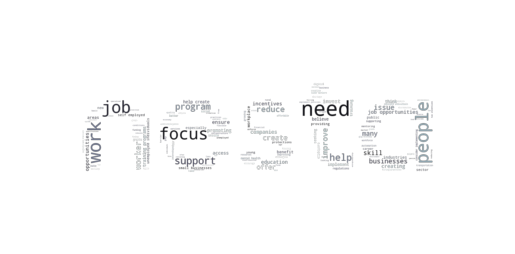

In [88]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()